309653002 林暐軒

Calculate and plot the reflectance R versus the wavelength 𝜆=350,….850 𝑛𝑚 of normal incident light to a DBR composed of N=2,3…6 pairs of high- and low-index layers of $d_i=\lambda_𝟎/𝟒𝒏_i$ with $𝑛_1=2.35$ and $𝑛_2=1.38$  and $𝜆_0=550$𝑛𝑚.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power

In [2]:
n1=2.35
D1=np.array([[1,1],[n1,-n1]])
D1

array([[ 1.  ,  1.  ],
       [ 2.35, -2.35]])

In [3]:
n2=1.38
D2=np.array([[1,1],[n2,-n2]])
D2

array([[ 1.  ,  1.  ],
       [ 1.38, -1.38]])

In [4]:
lamb0=550
d1=lamb0/(4*n1)
d2=lamb0/(4*n2)

lamb=350


ph1=2*np.pi*(d1/(lamb/n1))
P1=np.array([[np.exp(ph1*-1j),0],[0,np.exp(ph1*1j)]])

ph2=2*np.pi*(d2/(lamb/n2))
P2=np.array([[np.exp(ph2*-1j),0],[0,np.exp(ph2*1j)]])

D1_inv=np.linalg.inv(D1)

D2_inv=np.linalg.inv(D2)

A=np.matmul(D1_inv,D2)
A=np.matmul(A,P2)
A=np.matmul(A,D2_inv)
A=np.matmul(A,D1)

A=np.matmul(A,P1)
M=A

N=6
M_N=matrix_power(M,N)

R=abs(M_N[1,0]/M_N[0,0])**2
R

0.08108822413908869

In [5]:
def reflectance_of_DBR(n1,n2,N,lamb0,lamb):
    D1=np.array([[1,1],[n1,-n1]])
    D2=np.array([[1,1],[n2,-n2]])
    d1=lamb0/(4*n1)
    d2=lamb0/(4*n2)
    
    ph1=2*np.pi*(d1/(lamb/n1))
    P1=np.array([[np.exp(ph1*-1j),0],[0,np.exp(ph1*1j)]],dtype=object)

    ph2=2*np.pi*(d2/(lamb/n2))
    P2=np.array([[np.exp(ph2*-1j),0],[0,np.exp(ph2*1j)]],dtype=object)

    D1_inv=np.linalg.inv(D1)
    D2_inv=np.linalg.inv(D2)
    A=np.matmul(D1_inv,D2)
    A=np.matmul(A,P2)
    A=np.matmul(A,D2_inv)
    A=np.matmul(A,D1)
    A=np.matmul(A,P1)
    M=A
    
    M_N=matrix_power(M,N)
    R=abs(M_N[1,0]/M_N[0,0])**2
    
    return R

In [6]:
n1=2.35
n2=1.38
lamb0=550
lamb=np.arange(0,500)+350
reflect1=100*reflectance_of_DBR(n1,n2,2,lamb0,lamb)
reflect2=100*reflectance_of_DBR(n1,n2,3,lamb0,lamb)
reflect3=100*reflectance_of_DBR(n1,n2,4,lamb0,lamb)
reflect4=100*reflectance_of_DBR(n1,n2,5,lamb0,lamb)
reflect5=100*reflectance_of_DBR(n1,n2,6,lamb0,lamb)

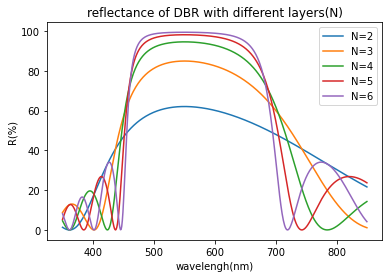

In [7]:
fig,ax=plt.subplots() #fig: 畫布 ax:圖
ax.plot(lamb,reflect1,label='N=2')
ax.plot(lamb,reflect2,label='N=3')
ax.plot(lamb,reflect3,label='N=4')
ax.plot(lamb,reflect4,label='N=5')
ax.plot(lamb,reflect5,label='N=6')

ax.set_xlabel('wavelengh(nm)')
ax.set_ylabel('R(%)')
ax.set_title('reflectance of DBR with different layers(N)')
ax.legend()